In [1]:
import re
import itertools
import matplotlib.pyplot as plt

In [2]:
data = """ResNet has 2959233 trainable parameters

Epoch: 01, Loss: 5.146, Time: 66.1, LR: 0.00100
Epoch: 02, Loss: 0.558, Time: 65.5, LR: 0.00100
Epoch: 03, Loss: 0.512, Time: 65.3, LR: 0.00100
Epoch: 04, Loss: 0.485, Time: 65.3, LR: 0.00100
Epoch: 05, Loss: 0.466, Time: 65.3, LR: 0.00100
Epoch: 06, Loss: 0.451, Time: 65.3, LR: 0.00100
Epoch: 07, Loss: 0.444, Time: 65.4, LR: 0.00100
Epoch: 08, Loss: 0.438, Time: 65.2, LR: 0.00100
Epoch: 09, Loss: 0.432, Time: 65.3, LR: 0.00100
Epoch: 10, Loss: 0.424, Time: 65.3, LR: 0.00100
Epoch: 11, Loss: 0.421, Time: 65.2, LR: 0.00100
Epoch: 12, Loss: 0.417, Time: 65.3, LR: 0.00100
Epoch: 13, Loss: 0.414, Time: 65.3, LR: 0.00100
Epoch: 14, Loss: 0.410, Time: 65.3, LR: 0.00100
Epoch: 15, Loss: 0.408, Time: 65.3, LR: 0.00100
Epoch: 16, Loss: 0.409, Time: 65.4, LR: 0.00100
Epoch: 17, Loss: 0.402, Time: 65.5, LR: 0.00100
Epoch: 18, Loss: 0.400, Time: 65.4, LR: 0.00100
Epoch: 19, Loss: 0.397, Time: 65.4, LR: 0.00100
Epoch: 20, Loss: 0.395, Time: 65.4, LR: 0.00100
Epoch: 21, Loss: 0.393, Time: 65.4, LR: 0.00100
Epoch: 22, Loss: 0.391, Time: 65.4, LR: 0.00100
Epoch: 23, Loss: 0.392, Time: 65.3, LR: 0.00100
Epoch: 24, Loss: 0.388, Time: 65.4, LR: 0.00100
Epoch: 25, Loss: 0.388, Time: 65.4, LR: 0.00100
Epoch: 26, Loss: 0.387, Time: 65.3, LR: 0.00100
Epoch: 27, Loss: 0.387, Time: 65.3, LR: 0.00100
Epoch: 28, Loss: 0.384, Time: 65.3, LR: 0.00100
Epoch: 29, Loss: 0.386, Time: 65.2, LR: 0.00100
Epoch: 30, Loss: 0.382, Time: 65.3, LR: 0.00100
Epoch: 31, Loss: 0.383, Time: 65.4, LR: 0.00100
Epoch: 32, Loss: 0.378, Time: 65.2, LR: 0.00100
Epoch: 33, Loss: 0.381, Time: 65.1, LR: 0.00100
Epoch: 34, Loss: 0.380, Time: 65.3, LR: 0.00100
Epoch: 35, Loss: 0.378, Time: 65.2, LR: 0.00100
Epoch: 36, Loss: 0.378, Time: 65.3, LR: 0.00100
Epoch: 37, Loss: 0.368, Time: 65.3, LR: 0.00030
Epoch: 38, Loss: 0.367, Time: 65.3, LR: 0.00030
Epoch: 39, Loss: 0.366, Time: 65.4, LR: 0.00030
Epoch: 40, Loss: 0.364, Time: 65.3, LR: 0.00030
Epoch: 41, Loss: 0.366, Time: 65.2, LR: 0.00030
Epoch: 42, Loss: 0.366, Time: 65.3, LR: 0.00030
Epoch: 43, Loss: 0.366, Time: 65.2, LR: 0.00030
Epoch: 44, Loss: 0.367, Time: 65.4, LR: 0.00030
Epoch: 45, Loss: 0.363, Time: 65.3, LR: 0.00009
Epoch: 46, Loss: 0.360, Time: 65.3, LR: 0.00009
Epoch: 47, Loss: 0.362, Time: 65.2, LR: 0.00009
Epoch: 48, Loss: 0.362, Time: 65.2, LR: 0.00009
Epoch: 49, Loss: 0.362, Time: 65.1, LR: 0.00009
Epoch: 50, Loss: 0.362, Time: 65.3, LR: 0.00009



CondResNet has 3123073 trainable parameters

Epoch: 01, Loss: 2.856, Time: 73.8, LR: 0.00100
Epoch: 02, Loss: 0.628, Time: 73.7, LR: 0.00100
Epoch: 03, Loss: 0.524, Time: 73.7, LR: 0.00100
Epoch: 04, Loss: 0.487, Time: 73.5, LR: 0.00100
Epoch: 05, Loss: 0.470, Time: 73.6, LR: 0.00100
Epoch: 06, Loss: 0.459, Time: 73.5, LR: 0.00100
Epoch: 07, Loss: 0.449, Time: 73.5, LR: 0.00100
Epoch: 08, Loss: 0.441, Time: 73.4, LR: 0.00100
Epoch: 09, Loss: 0.432, Time: 73.5, LR: 0.00100
Epoch: 10, Loss: 0.433, Time: 73.6, LR: 0.00100
Epoch: 11, Loss: 0.424, Time: 73.5, LR: 0.00100
Epoch: 12, Loss: 0.420, Time: 73.5, LR: 0.00100
Epoch: 13, Loss: 0.417, Time: 73.6, LR: 0.00100
Epoch: 14, Loss: 0.410, Time: 73.5, LR: 0.00100
Epoch: 15, Loss: 0.412, Time: 73.4, LR: 0.00100
Epoch: 16, Loss: 0.404, Time: 73.5, LR: 0.00100
Epoch: 17, Loss: 0.402, Time: 73.5, LR: 0.00100
Epoch: 18, Loss: 0.397, Time: 73.5, LR: 0.00100
Epoch: 19, Loss: 0.395, Time: 73.6, LR: 0.00100
Epoch: 20, Loss: 0.394, Time: 73.5, LR: 0.00100
Epoch: 21, Loss: 0.391, Time: 73.6, LR: 0.00100
Epoch: 22, Loss: 0.390, Time: 73.6, LR: 0.00100
Epoch: 23, Loss: 0.387, Time: 73.7, LR: 0.00100
Epoch: 24, Loss: 0.385, Time: 73.7, LR: 0.00100
Epoch: 25, Loss: 0.382, Time: 73.6, LR: 0.00100
Epoch: 26, Loss: 0.382, Time: 73.7, LR: 0.00100
Epoch: 27, Loss: 0.380, Time: 73.7, LR: 0.00100
Epoch: 28, Loss: 0.381, Time: 73.5, LR: 0.00100
Epoch: 29, Loss: 0.379, Time: 73.6, LR: 0.00100
Epoch: 30, Loss: 0.377, Time: 73.5, LR: 0.00100
Epoch: 31, Loss: 0.377, Time: 73.5, LR: 0.00100
Epoch: 32, Loss: 0.373, Time: 73.5, LR: 0.00100
Epoch: 33, Loss: 0.375, Time: 73.5, LR: 0.00100
Epoch: 34, Loss: 0.373, Time: 73.5, LR: 0.00100
Epoch: 35, Loss: 0.378, Time: 73.6, LR: 0.00100
Epoch: 36, Loss: 0.372, Time: 73.5, LR: 0.00100
Epoch: 37, Loss: 0.370, Time: 73.4, LR: 0.00100
Epoch: 38, Loss: 0.370, Time: 73.5, LR: 0.00100
Epoch: 39, Loss: 0.368, Time: 73.5, LR: 0.00100
Epoch: 40, Loss: 0.367, Time: 73.6, LR: 0.00100
Epoch: 41, Loss: 0.365, Time: 73.6, LR: 0.00100
Epoch: 42, Loss: 0.364, Time: 73.5, LR: 0.00100
Epoch: 43, Loss: 0.366, Time: 73.6, LR: 0.00100
Epoch: 44, Loss: 0.365, Time: 73.7, LR: 0.00100
Epoch: 45, Loss: 0.361, Time: 73.6, LR: 0.00100
Epoch: 46, Loss: 0.363, Time: 73.6, LR: 0.00100
Epoch: 47, Loss: 0.362, Time: 73.5, LR: 0.00100
Epoch: 48, Loss: 0.360, Time: 73.5, LR: 0.00100
Epoch: 49, Loss: 0.362, Time: 73.6, LR: 0.00100
Epoch: 50, Loss: 0.363, Time: 73.5, LR: 0.00100
Epoch: 51, Loss: 0.361, Time: 73.4, LR: 0.00100
Epoch: 52, Loss: 0.358, Time: 73.6, LR: 0.00100
Epoch: 53, Loss: 0.360, Time: 73.5, LR: 0.00100
Epoch: 54, Loss: 0.360, Time: 73.6, LR: 0.00100
Epoch: 55, Loss: 0.361, Time: 73.6, LR: 0.00100
Epoch: 56, Loss: 0.357, Time: 73.6, LR: 0.00100
Epoch: 57, Loss: 0.357, Time: 73.7, LR: 0.00100
Epoch: 58, Loss: 0.357, Time: 73.5, LR: 0.00100
Epoch: 59, Loss: 0.360, Time: 73.6, LR: 0.00100
Epoch: 60, Loss: 0.358, Time: 73.5, LR: 0.00100
Epoch: 61, Loss: 0.358, Time: 73.5, LR: 0.00100
Epoch: 62, Loss: 0.356, Time: 73.6, LR: 0.00100
Epoch: 63, Loss: 0.356, Time: 73.6, LR: 0.00100
Epoch: 64, Loss: 0.355, Time: 73.6, LR: 0.00100
Epoch: 65, Loss: 0.354, Time: 73.7, LR: 0.00100
Epoch: 66, Loss: 0.356, Time: 73.6, LR: 0.00100
Epoch: 67, Loss: 0.356, Time: 73.7, LR: 0.00100
Epoch: 68, Loss: 0.354, Time: 73.5, LR: 0.00100
Epoch: 69, Loss: 0.355, Time: 73.7, LR: 0.00100
Epoch: 70, Loss: 0.350, Time: 73.6, LR: 0.00030
Epoch: 71, Loss: 0.349, Time: 73.6, LR: 0.00030
Epoch: 72, Loss: 0.347, Time: 73.6, LR: 0.00030
Epoch: 73, Loss: 0.346, Time: 73.5, LR: 0.00030
Epoch: 74, Loss: 0.347, Time: 73.6, LR: 0.00030
Epoch: 75, Loss: 0.348, Time: 73.6, LR: 0.00030
Epoch: 76, Loss: 0.348, Time: 73.6, LR: 0.00030
Epoch: 77, Loss: 0.347, Time: 73.5, LR: 0.00030
Epoch: 78, Loss: 0.349, Time: 73.6, LR: 0.00009
Epoch: 79, Loss: 0.344, Time: 73.6, LR: 0.00009
Epoch: 80, Loss: 0.346, Time: 73.6, LR: 0.00009
Epoch: 81, Loss: 0.344, Time: 73.5, LR: 0.00009
Epoch: 82, Loss: 0.344, Time: 73.6, LR: 0.00009
Epoch: 83, Loss: 0.344, Time: 73.7, LR: 0.00009



ZeroResNet has 3123073 trainable parameters

Epoch: 01, Loss: 0.864, Time: 73.4, LR: 0.00100
Epoch: 02, Loss: 0.627, Time: 73.6, LR: 0.00100
Epoch: 03, Loss: 0.506, Time: 73.7, LR: 0.00100
Epoch: 04, Loss: 0.463, Time: 73.6, LR: 0.00100
Epoch: 05, Loss: 0.437, Time: 73.5, LR: 0.00100
Epoch: 06, Loss: 0.421, Time: 73.7, LR: 0.00100
Epoch: 07, Loss: 0.409, Time: 73.7, LR: 0.00100
Epoch: 08, Loss: 0.401, Time: 73.5, LR: 0.00100
Epoch: 09, Loss: 0.395, Time: 73.6, LR: 0.00100
Epoch: 10, Loss: 0.393, Time: 73.7, LR: 0.00100
Epoch: 11, Loss: 0.394, Time: 73.6, LR: 0.00100
Epoch: 12, Loss: 0.385, Time: 73.6, LR: 0.00100
Epoch: 13, Loss: 0.384, Time: 73.6, LR: 0.00100
Epoch: 14, Loss: 0.380, Time: 73.7, LR: 0.00100
Epoch: 15, Loss: 0.379, Time: 73.6, LR: 0.00100
Epoch: 16, Loss: 0.377, Time: 73.8, LR: 0.00100
Epoch: 17, Loss: 0.376, Time: 73.7, LR: 0.00100
Epoch: 18, Loss: 0.374, Time: 73.6, LR: 0.00100
Epoch: 19, Loss: 0.373, Time: 73.6, LR: 0.00100
Epoch: 20, Loss: 0.371, Time: 73.6, LR: 0.00100
Epoch: 21, Loss: 0.369, Time: 73.6, LR: 0.00100
Epoch: 22, Loss: 0.368, Time: 73.6, LR: 0.00100
Epoch: 23, Loss: 0.367, Time: 73.6, LR: 0.00100
Epoch: 24, Loss: 0.368, Time: 73.6, LR: 0.00100
Epoch: 25, Loss: 0.365, Time: 73.5, LR: 0.00100
Epoch: 26, Loss: 0.366, Time: 73.5, LR: 0.00100
Epoch: 27, Loss: 0.363, Time: 73.5, LR: 0.00100
Epoch: 28, Loss: 0.363, Time: 73.6, LR: 0.00100
Epoch: 29, Loss: 0.362, Time: 73.6, LR: 0.00100
Epoch: 30, Loss: 0.364, Time: 73.5, LR: 0.00100
Epoch: 31, Loss: 0.362, Time: 73.6, LR: 0.00100
Epoch: 32, Loss: 0.361, Time: 73.4, LR: 0.00100
Epoch: 33, Loss: 0.363, Time: 73.5, LR: 0.00100
Epoch: 34, Loss: 0.359, Time: 73.6, LR: 0.00100
Epoch: 35, Loss: 0.359, Time: 73.5, LR: 0.00100
Epoch: 36, Loss: 0.357, Time: 73.5, LR: 0.00100
Epoch: 37, Loss: 0.360, Time: 73.5, LR: 0.00100
Epoch: 38, Loss: 0.359, Time: 73.7, LR: 0.00100
Epoch: 39, Loss: 0.359, Time: 73.6, LR: 0.00100
Epoch: 40, Loss: 0.357, Time: 73.6, LR: 0.00100
Epoch: 41, Loss: 0.358, Time: 73.5, LR: 0.00100
Epoch: 42, Loss: 0.357, Time: 73.6, LR: 0.00100
Epoch: 43, Loss: 0.357, Time: 73.5, LR: 0.00100
Epoch: 44, Loss: 0.357, Time: 73.6, LR: 0.00100
Epoch: 45, Loss: 0.353, Time: 73.5, LR: 0.00030
Epoch: 46, Loss: 0.350, Time: 73.5, LR: 0.00030
Epoch: 47, Loss: 0.349, Time: 73.4, LR: 0.00030
Epoch: 48, Loss: 0.350, Time: 73.5, LR: 0.00030
Epoch: 49, Loss: 0.348, Time: 73.5, LR: 0.00030
Epoch: 50, Loss: 0.348, Time: 73.4, LR: 0.00030
Epoch: 51, Loss: 0.349, Time: 73.5, LR: 0.00030
Epoch: 52, Loss: 0.351, Time: 73.6, LR: 0.00030
Epoch: 53, Loss: 0.349, Time: 73.6, LR: 0.00030
Epoch: 54, Loss: 0.348, Time: 73.5, LR: 0.00030
Epoch: 55, Loss: 0.347, Time: 73.6, LR: 0.00009
Epoch: 56, Loss: 0.346, Time: 73.5, LR: 0.00009
Epoch: 57, Loss: 0.345, Time: 73.5, LR: 0.00009
Epoch: 58, Loss: 0.346, Time: 73.6, LR: 0.00009
Epoch: 59, Loss: 0.344, Time: 73.5, LR: 0.00009
Epoch: 60, Loss: 0.347, Time: 73.5, LR: 0.00009
Epoch: 61, Loss: 0.346, Time: 73.5, LR: 0.00009
Epoch: 62, Loss: 0.347, Time: 73.5, LR: 0.00009
Epoch: 63, Loss: 0.345, Time: 73.5, LR: 0.00009



UNet has 1943761 trainable parameters

Epoch: 01, Loss: 0.579, Time: 7.1, LR: 0.00100
Epoch: 02, Loss: 0.470, Time: 6.6, LR: 0.00100
Epoch: 03, Loss: 0.447, Time: 6.8, LR: 0.00100
Epoch: 04, Loss: 0.430, Time: 6.6, LR: 0.00100
Epoch: 05, Loss: 0.423, Time: 6.9, LR: 0.00100
Epoch: 06, Loss: 0.417, Time: 6.7, LR: 0.00100
Epoch: 07, Loss: 0.412, Time: 6.9, LR: 0.00100
Epoch: 08, Loss: 0.408, Time: 6.4, LR: 0.00100
Epoch: 09, Loss: 0.406, Time: 6.9, LR: 0.00100
Epoch: 10, Loss: 0.402, Time: 6.6, LR: 0.00100
Epoch: 11, Loss: 0.399, Time: 7.0, LR: 0.00100
Epoch: 12, Loss: 0.397, Time: 6.4, LR: 0.00100
Epoch: 13, Loss: 0.396, Time: 6.8, LR: 0.00100
Epoch: 14, Loss: 0.394, Time: 6.7, LR: 0.00100
Epoch: 15, Loss: 0.395, Time: 6.9, LR: 0.00100
Epoch: 16, Loss: 0.393, Time: 6.9, LR: 0.00100
Epoch: 17, Loss: 0.392, Time: 7.0, LR: 0.00100
Epoch: 18, Loss: 0.390, Time: 6.9, LR: 0.00100
Epoch: 19, Loss: 0.388, Time: 7.0, LR: 0.00100
Epoch: 20, Loss: 0.389, Time: 6.6, LR: 0.00100
Epoch: 21, Loss: 0.388, Time: 6.7, LR: 0.00100
Epoch: 22, Loss: 0.387, Time: 6.6, LR: 0.00100
Epoch: 23, Loss: 0.385, Time: 6.8, LR: 0.00100
Epoch: 24, Loss: 0.386, Time: 6.8, LR: 0.00100
Epoch: 25, Loss: 0.384, Time: 7.0, LR: 0.00100
Epoch: 26, Loss: 0.383, Time: 6.8, LR: 0.00100
Epoch: 27, Loss: 0.385, Time: 6.8, LR: 0.00100
Epoch: 28, Loss: 0.382, Time: 7.0, LR: 0.00100
Epoch: 29, Loss: 0.384, Time: 6.8, LR: 0.00100
Epoch: 30, Loss: 0.382, Time: 7.1, LR: 0.00100
Epoch: 31, Loss: 0.382, Time: 6.8, LR: 0.00100
Epoch: 32, Loss: 0.381, Time: 6.9, LR: 0.00100
Epoch: 33, Loss: 0.381, Time: 7.0, LR: 0.00100
Epoch: 34, Loss: 0.380, Time: 6.8, LR: 0.00100
Epoch: 35, Loss: 0.380, Time: 7.0, LR: 0.00100
Epoch: 36, Loss: 0.379, Time: 6.9, LR: 0.00100
Epoch: 37, Loss: 0.381, Time: 6.8, LR: 0.00100
Epoch: 38, Loss: 0.378, Time: 6.9, LR: 0.00100
Epoch: 39, Loss: 0.378, Time: 7.2, LR: 0.00100
Epoch: 40, Loss: 0.379, Time: 7.0, LR: 0.00100
Epoch: 41, Loss: 0.378, Time: 6.4, LR: 0.00100
Epoch: 42, Loss: 0.376, Time: 6.8, LR: 0.00100
Epoch: 43, Loss: 0.378, Time: 6.7, LR: 0.00100
Epoch: 44, Loss: 0.376, Time: 6.8, LR: 0.00100
Epoch: 45, Loss: 0.379, Time: 6.7, LR: 0.00100
Epoch: 46, Loss: 0.376, Time: 6.8, LR: 0.00100
Epoch: 47, Loss: 0.375, Time: 6.5, LR: 0.00100
Epoch: 48, Loss: 0.374, Time: 6.8, LR: 0.00100
Epoch: 49, Loss: 0.375, Time: 6.4, LR: 0.00100
Epoch: 50, Loss: 0.375, Time: 6.7, LR: 0.00100
Epoch: 51, Loss: 0.374, Time: 6.5, LR: 0.00100
Epoch: 52, Loss: 0.373, Time: 6.9, LR: 0.00100
Epoch: 53, Loss: 0.374, Time: 6.5, LR: 0.00100
Epoch: 54, Loss: 0.376, Time: 6.8, LR: 0.00100
Epoch: 55, Loss: 0.372, Time: 6.5, LR: 0.00100
Epoch: 56, Loss: 0.373, Time: 6.9, LR: 0.00100
Epoch: 57, Loss: 0.372, Time: 6.7, LR: 0.00100
Epoch: 58, Loss: 0.371, Time: 6.6, LR: 0.00100
Epoch: 59, Loss: 0.373, Time: 6.8, LR: 0.00100
Epoch: 60, Loss: 0.372, Time: 6.8, LR: 0.00100
Epoch: 61, Loss: 0.370, Time: 6.8, LR: 0.00100
Epoch: 62, Loss: 0.371, Time: 6.8, LR: 0.00100
Epoch: 63, Loss: 0.372, Time: 6.6, LR: 0.00100
Epoch: 64, Loss: 0.370, Time: 6.8, LR: 0.00100
Epoch: 65, Loss: 0.371, Time: 6.7, LR: 0.00100
Epoch: 66, Loss: 0.369, Time: 6.6, LR: 0.00030
Epoch: 67, Loss: 0.366, Time: 6.9, LR: 0.00030
Epoch: 68, Loss: 0.366, Time: 6.4, LR: 0.00030
Epoch: 69, Loss: 0.366, Time: 6.9, LR: 0.00030
Epoch: 70, Loss: 0.367, Time: 6.6, LR: 0.00030
Epoch: 71, Loss: 0.368, Time: 7.0, LR: 0.00030
Epoch: 72, Loss: 0.364, Time: 6.5, LR: 0.00009
Epoch: 73, Loss: 0.364, Time: 7.0, LR: 0.00009
Epoch: 74, Loss: 0.363, Time: 6.6, LR: 0.00009
Epoch: 75, Loss: 0.364, Time: 6.9, LR: 0.00009
Epoch: 76, Loss: 0.363, Time: 6.6, LR: 0.00009
Epoch: 77, Loss: 0.364, Time: 6.8, LR: 0.00009
Epoch: 78, Loss: 0.364, Time: 6.5, LR: 0.00009



CondUNet has 2037969 trainable parameters

Epoch: 01, Loss: 0.944, Time: 8.7, LR: 0.00100
Epoch: 02, Loss: 0.570, Time: 8.4, LR: 0.00100
Epoch: 03, Loss: 0.502, Time: 8.6, LR: 0.00100
Epoch: 04, Loss: 0.460, Time: 8.7, LR: 0.00100
Epoch: 05, Loss: 0.436, Time: 8.6, LR: 0.00100
Epoch: 06, Loss: 0.419, Time: 8.9, LR: 0.00100
Epoch: 07, Loss: 0.411, Time: 8.8, LR: 0.00100
Epoch: 08, Loss: 0.402, Time: 8.7, LR: 0.00100
Epoch: 09, Loss: 0.397, Time: 8.8, LR: 0.00100
Epoch: 10, Loss: 0.395, Time: 8.6, LR: 0.00100
Epoch: 11, Loss: 0.391, Time: 8.6, LR: 0.00100
Epoch: 12, Loss: 0.387, Time: 8.8, LR: 0.00100
Epoch: 13, Loss: 0.386, Time: 8.3, LR: 0.00100
Epoch: 14, Loss: 0.383, Time: 8.5, LR: 0.00100
Epoch: 15, Loss: 0.382, Time: 8.7, LR: 0.00100
Epoch: 16, Loss: 0.382, Time: 8.4, LR: 0.00100
Epoch: 17, Loss: 0.379, Time: 8.7, LR: 0.00100
Epoch: 18, Loss: 0.379, Time: 8.6, LR: 0.00100
Epoch: 19, Loss: 0.375, Time: 8.6, LR: 0.00100
Epoch: 20, Loss: 0.375, Time: 8.5, LR: 0.00100
Epoch: 21, Loss: 0.372, Time: 8.4, LR: 0.00100
Epoch: 22, Loss: 0.373, Time: 8.7, LR: 0.00100
Epoch: 23, Loss: 0.373, Time: 8.5, LR: 0.00100
Epoch: 24, Loss: 0.372, Time: 8.5, LR: 0.00100
Epoch: 25, Loss: 0.371, Time: 8.6, LR: 0.00100
Epoch: 26, Loss: 0.369, Time: 8.8, LR: 0.00100
Epoch: 27, Loss: 0.370, Time: 8.8, LR: 0.00100
Epoch: 28, Loss: 0.369, Time: 9.2, LR: 0.00100
Epoch: 29, Loss: 0.368, Time: 8.5, LR: 0.00100
Epoch: 30, Loss: 0.365, Time: 8.6, LR: 0.00100
Epoch: 31, Loss: 0.368, Time: 8.5, LR: 0.00100
Epoch: 32, Loss: 0.366, Time: 8.4, LR: 0.00100
Epoch: 33, Loss: 0.363, Time: 8.6, LR: 0.00100
Epoch: 34, Loss: 0.364, Time: 8.5, LR: 0.00100
Epoch: 35, Loss: 0.366, Time: 8.4, LR: 0.00100
Epoch: 36, Loss: 0.363, Time: 8.8, LR: 0.00100
Epoch: 37, Loss: 0.364, Time: 8.6, LR: 0.00100
Epoch: 38, Loss: 0.360, Time: 8.7, LR: 0.00030
Epoch: 39, Loss: 0.359, Time: 8.5, LR: 0.00030
Epoch: 40, Loss: 0.358, Time: 8.5, LR: 0.00030
Epoch: 41, Loss: 0.356, Time: 8.6, LR: 0.00030
Epoch: 42, Loss: 0.357, Time: 8.4, LR: 0.00030
Epoch: 43, Loss: 0.356, Time: 8.5, LR: 0.00030
Epoch: 44, Loss: 0.357, Time: 8.5, LR: 0.00030
Epoch: 45, Loss: 0.357, Time: 8.5, LR: 0.00030
Epoch: 46, Loss: 0.357, Time: 8.7, LR: 0.00030
Epoch: 47, Loss: 0.356, Time: 8.4, LR: 0.00030
Epoch: 48, Loss: 0.356, Time: 8.7, LR: 0.00009
Epoch: 49, Loss: 0.354, Time: 8.5, LR: 0.00009
Epoch: 50, Loss: 0.355, Time: 8.6, LR: 0.00009
Epoch: 51, Loss: 0.355, Time: 8.6, LR: 0.00009
Epoch: 52, Loss: 0.353, Time: 8.4, LR: 0.00009
Epoch: 53, Loss: 0.353, Time: 8.6, LR: 0.00009
Epoch: 54, Loss: 0.353, Time: 8.8, LR: 0.00009
Epoch: 55, Loss: 0.354, Time: 8.6, LR: 0.00009
Epoch: 56, Loss: 0.355, Time: 8.4, LR: 0.00009
Epoch: 57, Loss: 0.355, Time: 8.8, LR: 0.00009



ZeroUNet has 2037969 trainable parameters

Epoch: 01, Loss: 0.765, Time: 8.6, LR: 0.00100
Epoch: 02, Loss: 0.582, Time: 9.0, LR: 0.00100
Epoch: 03, Loss: 0.536, Time: 8.6, LR: 0.00100
Epoch: 04, Loss: 0.504, Time: 8.4, LR: 0.00100
Epoch: 05, Loss: 0.479, Time: 9.2, LR: 0.00100
Epoch: 06, Loss: 0.462, Time: 8.6, LR: 0.00100
Epoch: 07, Loss: 0.444, Time: 8.5, LR: 0.00100
Epoch: 08, Loss: 0.434, Time: 8.9, LR: 0.00100
Epoch: 09, Loss: 0.424, Time: 8.4, LR: 0.00100
Epoch: 10, Loss: 0.416, Time: 9.0, LR: 0.00100
Epoch: 11, Loss: 0.408, Time: 8.6, LR: 0.00100
Epoch: 12, Loss: 0.407, Time: 8.6, LR: 0.00100
Epoch: 13, Loss: 0.402, Time: 8.9, LR: 0.00100
Epoch: 14, Loss: 0.398, Time: 8.5, LR: 0.00100
Epoch: 15, Loss: 0.395, Time: 8.8, LR: 0.00100
Epoch: 16, Loss: 0.393, Time: 8.8, LR: 0.00100
Epoch: 17, Loss: 0.390, Time: 8.7, LR: 0.00100
Epoch: 18, Loss: 0.387, Time: 8.7, LR: 0.00100
Epoch: 19, Loss: 0.386, Time: 8.7, LR: 0.00100
Epoch: 20, Loss: 0.382, Time: 8.4, LR: 0.00100
Epoch: 21, Loss: 0.382, Time: 8.7, LR: 0.00100
Epoch: 22, Loss: 0.380, Time: 8.7, LR: 0.00100
Epoch: 23, Loss: 0.380, Time: 8.5, LR: 0.00100
Epoch: 24, Loss: 0.378, Time: 8.6, LR: 0.00100
Epoch: 25, Loss: 0.375, Time: 8.4, LR: 0.00100
Epoch: 26, Loss: 0.376, Time: 8.4, LR: 0.00100
Epoch: 27, Loss: 0.373, Time: 8.8, LR: 0.00100
Epoch: 28, Loss: 0.374, Time: 8.6, LR: 0.00100
Epoch: 29, Loss: 0.372, Time: 8.8, LR: 0.00100
Epoch: 30, Loss: 0.373, Time: 8.6, LR: 0.00100
Epoch: 31, Loss: 0.370, Time: 8.7, LR: 0.00100
Epoch: 32, Loss: 0.368, Time: 8.6, LR: 0.00100
Epoch: 33, Loss: 0.370, Time: 8.6, LR: 0.00100
Epoch: 34, Loss: 0.368, Time: 8.7, LR: 0.00100
Epoch: 35, Loss: 0.369, Time: 8.7, LR: 0.00100
Epoch: 36, Loss: 0.368, Time: 8.6, LR: 0.00100
Epoch: 37, Loss: 0.368, Time: 8.6, LR: 0.00100
Epoch: 38, Loss: 0.366, Time: 8.6, LR: 0.00100
Epoch: 39, Loss: 0.365, Time: 8.5, LR: 0.00100
Epoch: 40, Loss: 0.365, Time: 8.6, LR: 0.00100
Epoch: 41, Loss: 0.365, Time: 8.5, LR: 0.00100
Epoch: 42, Loss: 0.364, Time: 8.6, LR: 0.00100
Epoch: 43, Loss: 0.364, Time: 8.5, LR: 0.00100
Epoch: 44, Loss: 0.363, Time: 8.6, LR: 0.00100
Epoch: 45, Loss: 0.362, Time: 8.7, LR: 0.00100
Epoch: 46, Loss: 0.361, Time: 8.5, LR: 0.00100
Epoch: 47, Loss: 0.364, Time: 8.6, LR: 0.00100
Epoch: 48, Loss: 0.361, Time: 8.5, LR: 0.00100
Epoch: 49, Loss: 0.362, Time: 8.3, LR: 0.00100
Epoch: 50, Loss: 0.360, Time: 8.4, LR: 0.00100
Epoch: 51, Loss: 0.359, Time: 8.3, LR: 0.00100
Epoch: 52, Loss: 0.360, Time: 8.5, LR: 0.00100
Epoch: 53, Loss: 0.360, Time: 8.7, LR: 0.00100
Epoch: 54, Loss: 0.360, Time: 8.4, LR: 0.00100
Epoch: 55, Loss: 0.361, Time: 8.8, LR: 0.00100
Epoch: 56, Loss: 0.355, Time: 8.7, LR: 0.00030
Epoch: 57, Loss: 0.355, Time: 8.4, LR: 0.00030
Epoch: 58, Loss: 0.355, Time: 8.6, LR: 0.00030
Epoch: 59, Loss: 0.353, Time: 8.4, LR: 0.00030
Epoch: 60, Loss: 0.352, Time: 8.5, LR: 0.00030
Epoch: 61, Loss: 0.355, Time: 8.7, LR: 0.00030
Epoch: 62, Loss: 0.352, Time: 8.4, LR: 0.00030
Epoch: 63, Loss: 0.355, Time: 8.7, LR: 0.00030
Epoch: 64, Loss: 0.353, Time: 8.6, LR: 0.00030
Epoch: 65, Loss: 0.353, Time: 8.3, LR: 0.00009
Epoch: 66, Loss: 0.353, Time: 9.0, LR: 0.00009
Epoch: 67, Loss: 0.353, Time: 8.7, LR: 0.00009
Epoch: 68, Loss: 0.352, Time: 8.6, LR: 0.00009
Epoch: 69, Loss: 0.351, Time: 8.7, LR: 0.00009
Epoch: 70, Loss: 0.350, Time: 8.7, LR: 0.00009
Epoch: 71, Loss: 0.350, Time: 8.8, LR: 0.00009
Epoch: 72, Loss: 0.353, Time: 8.6, LR: 0.00009
Epoch: 73, Loss: 0.351, Time: 8.3, LR: 0.00009
Epoch: 74, Loss: 0.351, Time: 8.8, LR: 0.00009



CelebA has 7954467 trainable parameters

Epoch: 01, Loss: 0.423, Time: 350.4, LR: 0.00100
Epoch: 02, Loss: 0.317, Time: 349.8, LR: 0.00100
Epoch: 03, Loss: 0.304, Time: 350.2, LR: 0.00100
Epoch: 04, Loss: 0.297, Time: 348.2, LR: 0.00100
Epoch: 05, Loss: 0.292, Time: 348.4, LR: 0.00100
Epoch: 06, Loss: 0.291, Time: 351.7, LR: 0.00100
Epoch: 07, Loss: 0.284, Time: 349.6, LR: 0.00100
Epoch: 08, Loss: 0.284, Time: 348.2, LR: 0.00100
Epoch: 09, Loss: 0.281, Time: 349.7, LR: 0.00100
Epoch: 10, Loss: 0.280, Time: 349.1, LR: 0.00100
Epoch: 11, Loss: 0.277, Time: 349.8, LR: 0.00100
Epoch: 12, Loss: 0.276, Time: 350.0, LR: 0.00100
Epoch: 13, Loss: 0.276, Time: 349.4, LR: 0.00100
Epoch: 14, Loss: 0.275, Time: 346.0, LR: 0.00100
Epoch: 15, Loss: 0.273, Time: 347.0, LR: 0.00100
Epoch: 16, Loss: 0.273, Time: 345.9, LR: 0.00100
Epoch: 17, Loss: 0.272, Time: 345.7, LR: 0.00100
Epoch: 18, Loss: 0.272, Time: 348.1, LR: 0.00100
Epoch: 19, Loss: 0.271, Time: 346.0, LR: 0.00100
Epoch: 20, Loss: 0.270, Time: 348.6, LR: 0.00100
Epoch: 21, Loss: 0.271, Time: 350.6, LR: 0.00100
Epoch: 22, Loss: 0.270, Time: 348.9, LR: 0.00100
Epoch: 23, Loss: 0.269, Time: 347.3, LR: 0.00100
Epoch: 24, Loss: 0.268, Time: 350.4, LR: 0.00100
Epoch: 25, Loss: 0.268, Time: 347.7, LR: 0.00100
Epoch: 26, Loss: 0.268, Time: 347.3, LR: 0.00100
Epoch: 27, Loss: 0.268, Time: 348.2, LR: 0.00100
Epoch: 28, Loss: 0.268, Time: 347.8, LR: 0.00100
Epoch: 29, Loss: 0.267, Time: 346.5, LR: 0.00100
Epoch: 30, Loss: 0.268, Time: 344.8, LR: 0.00100
Epoch: 31, Loss: 0.267, Time: 347.0, LR: 0.00100
Epoch: 32, Loss: 0.266, Time: 347.0, LR: 0.00100
Epoch: 33, Loss: 0.267, Time: 347.5, LR: 0.00100
Epoch: 34, Loss: 0.266, Time: 346.3, LR: 0.00100
Epoch: 35, Loss: 0.264, Time: 348.8, LR: 0.00100
Epoch: 36, Loss: 0.266, Time: 347.4, LR: 0.00100
Epoch: 37, Loss: 0.265, Time: 346.3, LR: 0.00100
Epoch: 38, Loss: 0.265, Time: 345.9, LR: 0.00100
Epoch: 39, Loss: 0.266, Time: 346.6, LR: 0.00100
Epoch: 40, Loss: 0.262, Time: 348.6, LR: 0.00030
Epoch: 41, Loss: 0.262, Time: 349.6, LR: 0.00030
Epoch: 42, Loss: 0.262, Time: 345.9, LR: 0.00030
Epoch: 43, Loss: 0.262, Time: 349.1, LR: 0.00030
Epoch: 44, Loss: 0.262, Time: 345.9, LR: 0.00030
Epoch: 45, Loss: 0.261, Time: 347.3, LR: 0.00009
Epoch: 46, Loss: 0.260, Time: 346.9, LR: 0.00009
Epoch: 47, Loss: 0.261, Time: 347.4, LR: 0.00009
Epoch: 48, Loss: 0.261, Time: 347.7, LR: 0.00009
Epoch: 49, Loss: 0.261, Time: 348.2, LR: 0.00009
Epoch: 50, Loss: 0.260, Time: 346.9, LR: 0.00009"""

In [3]:
pattern = "Epoch: (?P<epoch>[\d.]+), Loss: (?P<loss>[\d.]+), Time: (?P<time>[\d.]+), LR: (?P<lr>[\d.]+)"

In [4]:
res = {}
for doc in data.split("\n\n\n\n"):
  loss = []
  time = []
  name, lines = doc.split("\n\n")
  for line in lines.split("\n"):
    m = re.match(pattern, line)
    loss.append(float(m.group("loss")))
    time.append(float(m.group("time")))
  res[name.split(" ")[0]] = {
      "loss": loss,
      "time": list(itertools.accumulate(time)),
  }

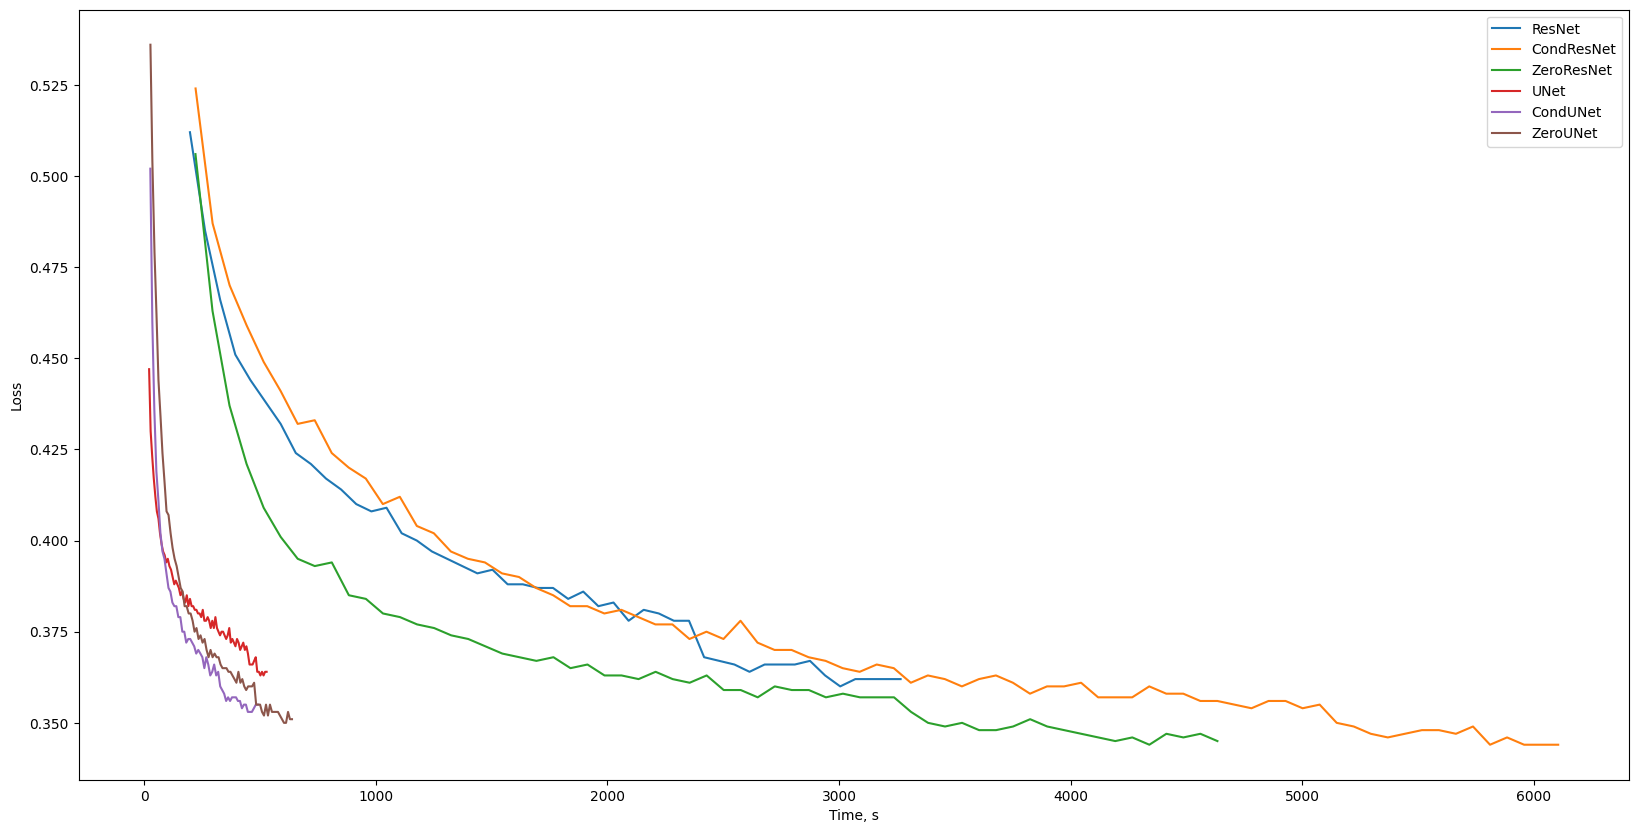

In [5]:
plt.figure(figsize=(20, 10))
for name, data in res.items():
  if name != "CelebA":
    plt.plot(data["time"][2:], data["loss"][2:], label=name)
plt.xlabel("Time, s")
plt.ylabel("Loss")
plt.legend()

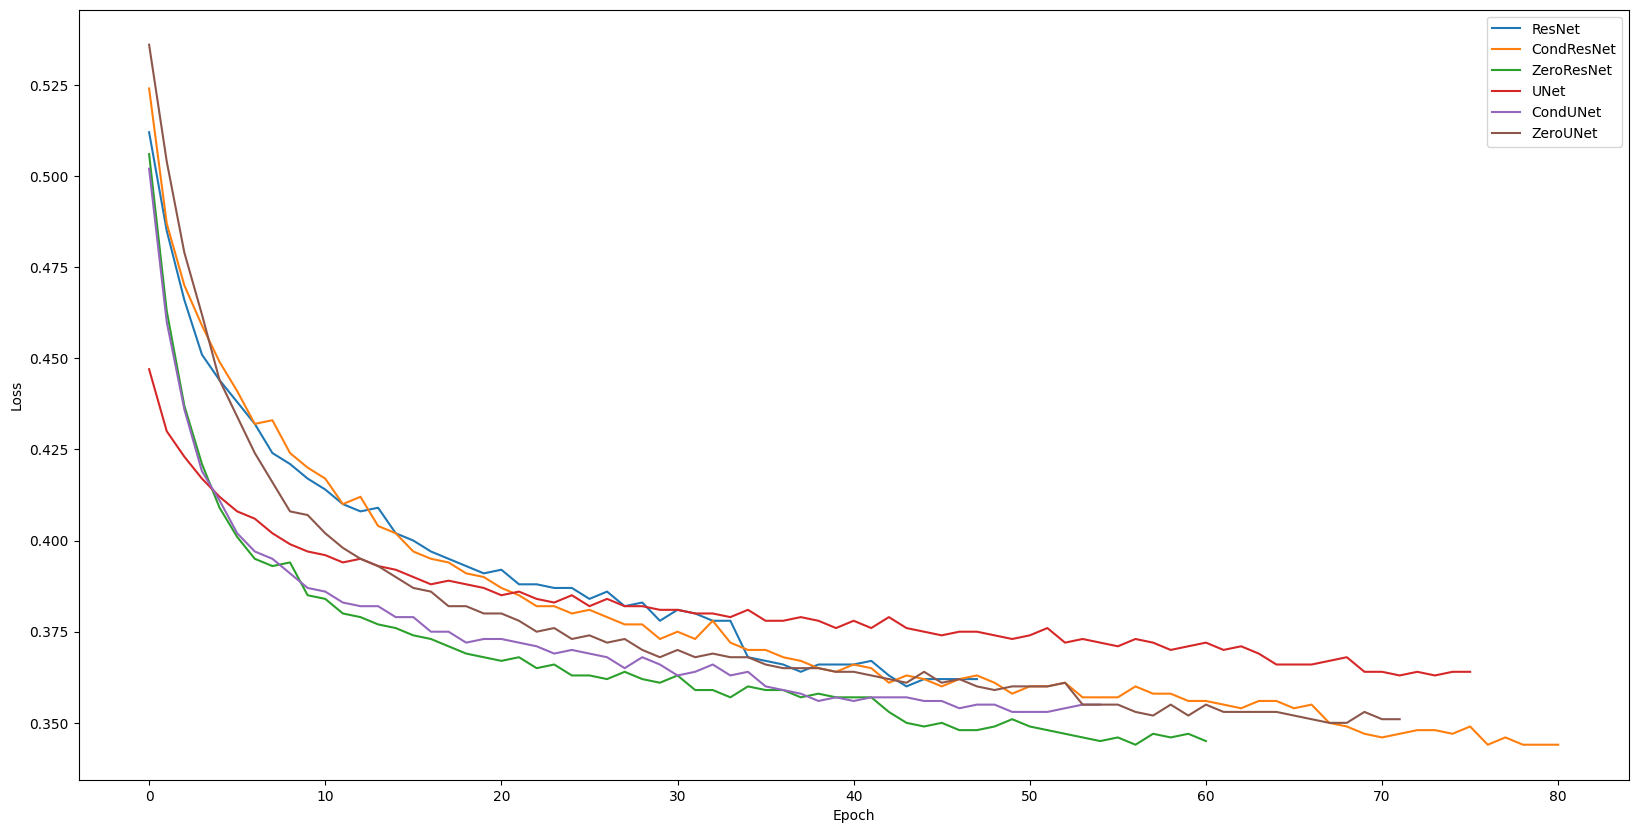

In [6]:
plt.figure(figsize=(20, 10))
for name, data in res.items():
  if name != "CelebA":
    plt.plot(data["loss"][2:], label=name)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [7]:
plt.figure(figsize=(20, 10))
x = []
y = []
for name, data in res.items():
  if name != "CelebA":
    x.append(name)
    y.append(data["loss"][-1])
plt.bar(x, y)
plt.ylim(0.34, 0.37)
plt.xlabel("Model")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')